# Pandas and Illustrator

**Do these in whatever order you'd like.** Feel free to do a bar graph, then skip ahead to some Buzzfeed line graphs, etc. Start in pandas, then once you save move on over to Illustrator.

Do each group - NYT, Buzzfeed, FiveThirtyEight, Economist, Guardian - in a different notebook.  I'm only leaving spaces in these here so you can scroll through them more easily.

Be sure to check out the other notebook for **tips and hints**.

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
matplotlib.rcParams['pdf.fonttype'] = 42


%matplotlib inline

# NYT: Bar graphs

Recreate the bar charts from [this piece](https://www.nytimes.com/2017/12/20/upshot/democrats-2018-congressional-elections-polling.html) and [this piece](https://www.nytimes.com/2017/12/27/business/the-robots-are-coming-and-sweden-is-fine.html) and [this piece](https://www.nytimes.com/2017/09/29/upshot/dont-forget-the-republicans-incumbency-advantage-in-2018.html).

![](images/sample-nyt.png)

**Data:** 
   
* `generic_poll_lead.csv`
* `social-spending.csv`
* `cook_pvi.csv`

In [3]:
df = pd.read_csv("generic_poll_lead.csv")

In [4]:
df.head()

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no


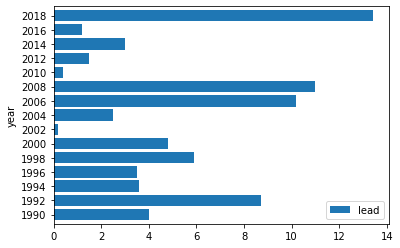

In [5]:
df.sort_values(by='year').plot(x='year', y='lead', kind='barh', width=0.8)
plt.savefig("poll.pdf")

In [59]:
df1 = pd.read_csv("social-spending.csv")

In [60]:
df1.head()


,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%


In [76]:
df1['Social_Spending'] = df1['Social Spending'].str.rstrip('%').astype('float')

In [77]:
df1['Social Spending'].dtype

dtype('O')

In [70]:
df1['Country_per'] = df1['Country'].str.cat(df1['Social Spending'], sep=' ')

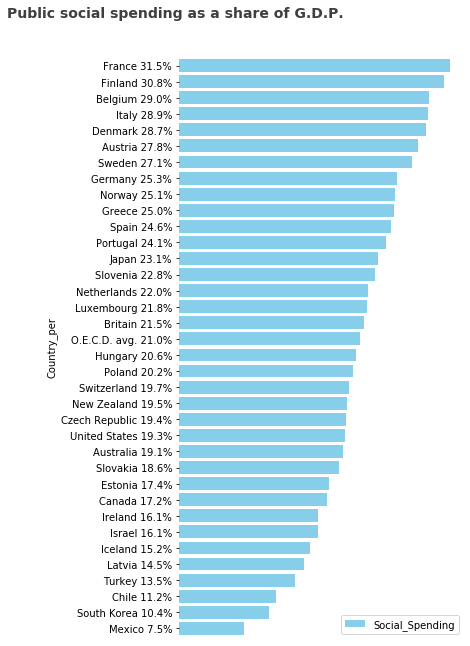

In [99]:

df1.sort_values(by='Social_Spending').plot(y='Social_Spending', x='Country_per', kind='barh', width=0.8, figsize=(8, 9), color='skyblue')
plt.text(x = -20, y = 38, s = 'Public social spending as a share of G.D.P.',
               fontsize = 14, weight = 'bold', alpha = .75)
plt.xticks([])
plt.box(False)
plt.tight_layout()
plt.savefig("social.pdf")


In [11]:
df2 = pd.read_csv("cook_pvi.csv")

In [12]:
df2.head()

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25


In [13]:
df2.dtypes

cook_pvi        object
pct_defeated     int64
dtype: object

In [14]:
df2['incombent_survives'] = 100 - df2['pct_defeated']

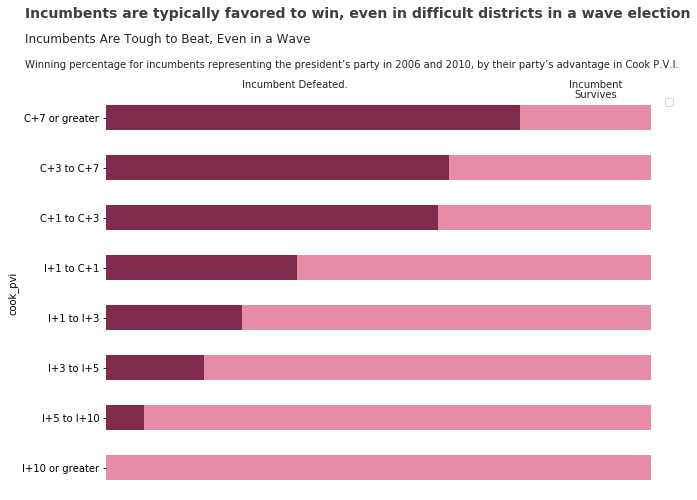

In [100]:
colors = ["#802B4E", "#E68CA7"]
df2.sort_values(by='pct_defeated').plot(x='cook_pvi', y=['pct_defeated', 'incombent_survives'], kind='barh', stacked=True, color=colors, figsize=(10, 7))
plt.legend('')
plt.box(False)
plt.xticks([])
plt.text(x = -15, y = 9, s = 'Incumbents are typically favored to win, even in difficult districts in a wave election',
               fontsize = 14, weight = 'bold', alpha = .75)
plt.text(x = -15, y = 8.5,
               s = 'Incumbents Are Tough to Beat, Even in a Wave',
              fontsize = 12, alpha = .85)
plt.text(x = -15, y = 8,
               s = 'Winning percentage for incumbents representing the president’s party in 2006 and 2010, by their party’s advantage in Cook P.V.I.',
              fontsize = 10, alpha = .85)
plt.text(x = 25, y = 7.6,
               s = 'Incumbent Defeated.',
              fontsize = 10, alpha = .85)
plt.text(x = 85, y = 7.6,
               s = 'Incumbent',
              fontsize = 10, alpha = .85)
plt.text(x = 86, y = 7.4,
               s = 'Survives',
              fontsize = 10, alpha = .85)
plt.tight_layout()
plt.savefig("Incumbents.pdf")

# Buzzfeed: Diversity in the Agriculture Department

You are going to recreate the two line-graph visualizations in [this piece](https://www.buzzfeed.com/jsvine/agriculture-department-political-appointee-diversity) by the super-famous [Jeremy Singer-Vine](https://twitter.com/jsvine). If he can do it, you can too!

![](images/buzzfeed.png)

**I've included the 100% beautiful, cleaned up data:** `gender-by-quarter.csv` and `diversity-by-quarter.csv`.

Since there isn't much cleaning to do, this work is mostly going to be about **how to move between pandas/matplotlib and finish things up in Illustrator.**


In [101]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
matplotlib.rcParams['pdf.fonttype'] = 42


%matplotlib inline

In [108]:
df4 = pd.read_csv("gender-by-quarter.csv")

In [109]:
df4.head()

,quarter,toa_group,count_all,count_female,pct_female
0,1998-09,all-permanent,1556531,667289,42.870267
1,1998-09,midlevel-appointees,1999,1009,50.475238
2,1999-09,all-permanent,1536156,660663,43.007546
3,1999-09,midlevel-appointees,2025,1018,50.271605
4,2000-09,all-permanent,1524883,658788,43.202528


In [119]:
df4_all = df4[df4.toa_group == 'all-permanent']
df4_all.head()

,quarter,toa_group,count_all,count_female,pct_female
0,1998-09,all-permanent,1556531,667289,42.870267
2,1999-09,all-permanent,1536156,660663,43.007546
4,2000-09,all-permanent,1524883,658788,43.202528
6,2001-09,all-permanent,1536627,666477,43.372725
8,2002-09,all-permanent,1579254,682586,43.222053


In [121]:
df4_mid = df4[df4.toa_group == 'midlevel-appointees']
df4_mid.head()

,quarter,toa_group,count_all,count_female,pct_female
1,1998-09,midlevel-appointees,1999,1009,50.475238
3,1999-09,midlevel-appointees,2025,1018,50.271605
5,2000-09,midlevel-appointees,1826,933,51.095290
7,2001-09,midlevel-appointees,1211,505,41.701073
9,2002-09,midlevel-appointees,2006,804,40.079761


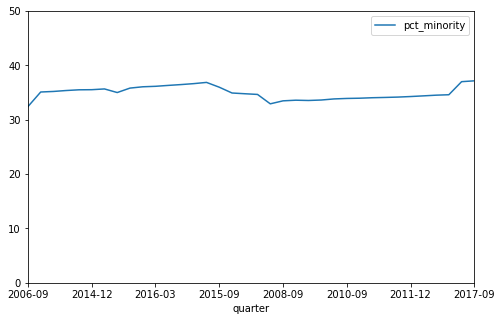

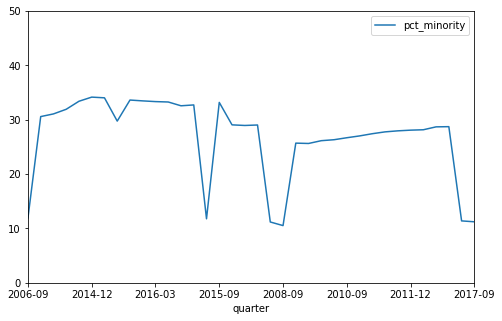

In [159]:
#df4_all.sort_values(by='toa_group').plot(x='quarter', y='pct_female', figsize=(8,5), ylim=[0, 50])
#df4_mid.sort_values(by='toa_group').plot(x='quarter', y='pct_female', figsize=(8,5), ylim=[0, 50])
df5_all.sort_values(by='toa_group').plot(x='quarter', y='pct_minority', figsize=(8,5), ylim=[0, 50])
df5_mid.sort_values(by='toa_group').plot(x='quarter', y='pct_minority', figsize=(8,5), ylim=[0, 50])

In [131]:
df5 = pd.read_csv("diversity-by-quarter.csv")

In [132]:
df5.head()

,quarter,toa_group,count_all,count_minority,pct_minority
0,2006-09,all-permanent,1608157,521323,32.417419
1,2006-09,midlevel-appointees,2246,268,11.932324
2,2007-09,all-permanent,1618159,532756,32.923588
3,2007-09,midlevel-appointees,2315,259,11.187905
4,2008-09,all-permanent,1673249,560098,33.473679


In [133]:
df5_all = df5[df5.toa_group == 'all-permanent']
df5_all.head()

,quarter,toa_group,count_all,count_minority,pct_minority
0,2006-09,all-permanent,1608157,521323,32.417419
2,2007-09,all-permanent,1618159,532756,32.923588
4,2008-09,all-permanent,1673249,560098,33.473679
6,2009-09,all-permanent,1757105,590216,33.590252
8,2009-12,all-permanent,1777356,596118,33.539595


In [148]:
df5_mid = df5[df5.toa_group == 'midlevel-appointees']
df5_mid.head()

,quarter,toa_group,count_all,count_minority,pct_minority
1,2006-09,midlevel-appointees,2246,268,11.932324
3,2007-09,midlevel-appointees,2315,259,11.187905
5,2008-09,midlevel-appointees,2138,225,10.523854
7,2009-09,midlevel-appointees,1767,454,25.693265
9,2009-12,midlevel-appointees,1943,498,25.630468


# FiveThirtyEight: What makes Nigel Richards the best at Scrabble?

You are going to recreate the visualizations in [this piece](https://fivethirtyeight.com/features/what-makes-nigel-richards-the-best-scrabble-player-on-earth/) by [Oliver Roeder](https://twitter.com/ollie). This is one of my favorite series of charts in all of history! 

(When you break them down by divisions, though, don't draw the circles.)

![](images/sample-538.png)

**I've included the data, but there's a little work to be done:** 

* `scrabble-point-spread.csv` - the points for and against each player at Nationals from one year (2013)
* `scrabble-tournament.csv` - rating and division data for each player at Nationals from one year (2013)
* `ranked-players-with-scores.csv` - the top 200 ranked players and their average points per game (2018)

Note that the ranking data is from 2018 so the graph that uses it will look a bit different.


In [3]:
dfa = pd.read_csv("scrabble-point-spread.csv")
dfa.head()

,player_id,points_against,points_for,tournament_id
0,6003,381,443,8163
1,20749,375,435,8163
2,19535,391,443,8163
3,18474,386,439,8163
4,583,396,450,8163


In [4]:
dfb = pd.read_csv("scrabble-tournament.csv")
dfb.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


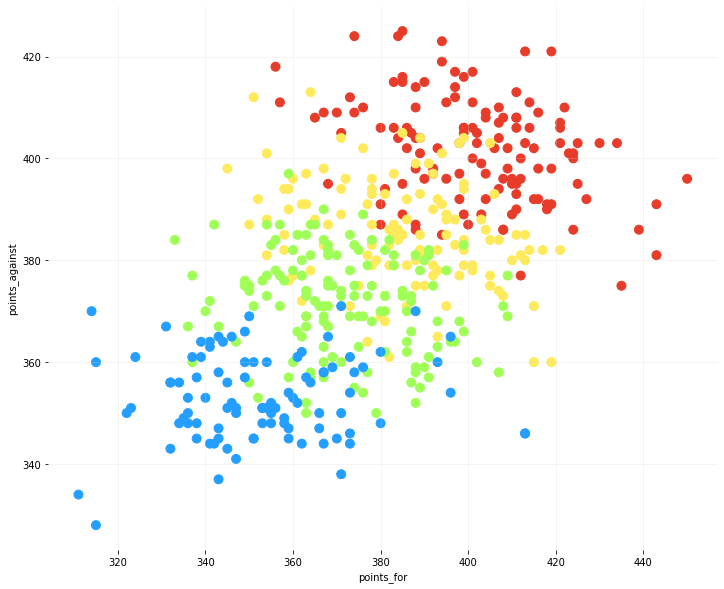

In [15]:
def build_colors(dfb):
    if dfb['division'] == 'Division 1':
        return '#E83C2A'
    elif dfb['division'] == 'Division 2':
        return '#FFEA5B'
    elif dfb['division'] == 'Division 3':
        return '#9FFF57'
    elif dfb['division'] == 'Division 4':
        return '#249FFF'
colors = dfb.reset_index().apply(build_colors, axis=1)

dfa.plot(x='points_for', y='points_against', color=colors, kind='scatter', figsize = (12, 10), marker='o', s=80, alpha=1, )
plt.grid(color= 'lightgrey', alpha=0.3, zorder=0)

plt.box(False)

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0      lightgrey
1      lightgrey
2      lightgrey
3      lightgrey
4      lightgrey
5      lightgrey
6      lightgrey
7      lightgrey
8      lightgrey
9      lightgrey
10     lightgrey
11     lightgrey
12     lightgrey
13     lightgrey
14     lightgrey
15     lightgrey
16     lightgrey
17     lightgrey
18     lightgrey
19     lightgrey
20     lightgrey
21     lightgrey
22     lightgrey
23     lightgrey
24     lightgrey
25     lightgrey
26     lightgrey
27     lightgrey
28     lightgrey
29     lightgrey
         ...    
451         None
452         None
453         None
454         None
455         None
456         None
457         None
458         None
459         None
460         None
461         None
462         None
463         None
464         None
465         None
466         None
467         None
468         None
469         None
470         None
471         None
472         None
473         None
474         None
475         None
476         None
477         None
478         None
479         None
480         None
Length: 481, dtype: object.

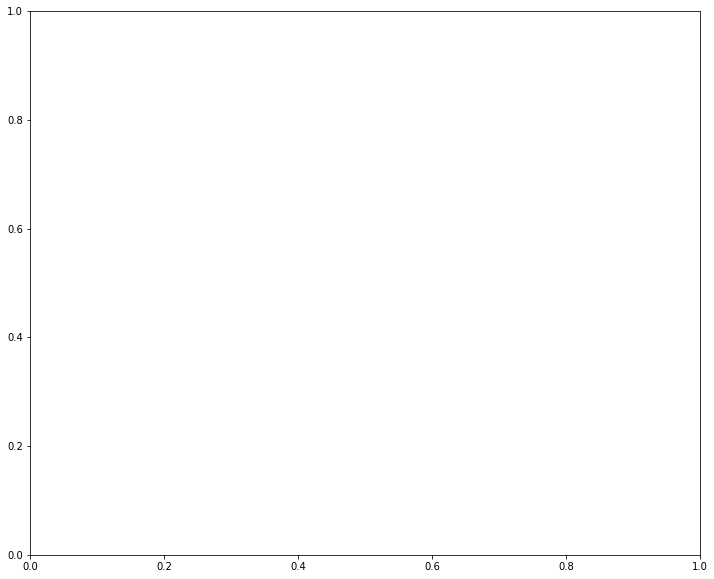

In [13]:
def build_colors(dfb):
    if dfb['division'] == 'Division 1': return 'lightgrey'
colors = dfb.reset_index().apply(build_colors, axis=1)

dfa.plot(x='points_for', y='points_against', color=colors, kind='scatter', figsize = (12, 10), marker='o', s=80, alpha=1, )
plt.grid(color= 'lightgrey', alpha=0.3, zorder=0)

plt.box(False)

# The Economist

Recreate the donut chart from [this piece](https://www.economist.com/blogs/graphicdetail/2012/07/daily-chart-0) even though [they're terrible](https://peltiertech.com/chart-busters-the-economist-doesnt-read-forbes/).

![](images/economist.png)

In fact, the pies are _so terrible_ we're going to **recreate the [revised chart](https://peltiertech.com/chart-busters-the-economist-doesnt-read-forbes/), too**. The important thing about it is that while the original chart focuses on the actual values in 2007 and 2011, the arrow chart reduces those values to **just the change**, which is (arguably) the important part.

![](images/econ-revised.png)

The revised chart is ugly, though, so we're going to make it look nicer.

1. Slightly change the chart type (See Homework Hints file)
2. Change the colors (Make it match the Economist)
3. Change any other styles/font/etc (Make it match the Economist
4. Order the bars (Order by what? Up to you.)

**Data:** 
   
* `bank-profits.csv`

# The Guardian

We'll be recreating a single graph each from 

1. [this piece](https://www.theguardian.com/news/datablog/2018/jan/26/no-equality-in-the-honours-two-thirds-of-australia-day-awards-go-to-men)
2. and [this piece](https://www.theguardian.com/inequality/datablog/2017/jul/17/which-countries-most-and-least-committed-to-reducing-inequality-oxfam-dfi)
3. and [this piece](https://www.theguardian.com/money/datablog/2017/jan/06/tracking-the-cost-uk-and-european-commuter-rail-fares-compared-in-data)

![](images/guardian.png)

We'll be using skills from the Economist revision, so **please do that one first!**

**Data:**

* `order-of-australia.csv`
* `oxfam.csv`
* `commute.csv`